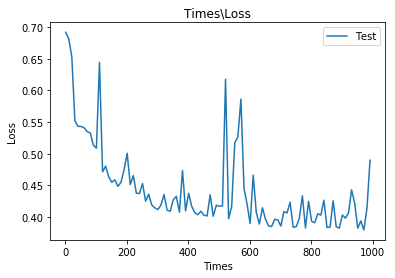

0.7373625698667158


In [1]:
from sklearn.externals.joblib import Memory
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import math
import random
def get_data_test():
    data = load_svmlight_file("a9a.t")
    return data[0], data[1]
def get_data_train():
    data = load_svmlight_file("a9a")
    return data[0], data[1]
def getSimo(wx):
    if wx<-14:
        return 0.000001
    elif wx>14:
        return 0.999999
    else:
        return 1/(1+math.exp(-wx))
def getLog(y,hx):
    #if hx==0:
        #hx=0.0000001
    return y*math.log(hx)+(1-y)*math.log(1-hx)
def getRate(G,learningRate):
    return learningRate/(math.sqrt(G+0.00000001))
def getRateAdaDelta(G,T):
    return (math.sqrt(T+0.00000001))/(math.sqrt(G+0.00000001))
def getRate(G,A):
    return A/(math.sqrt(G+0.00000001))
X_train,y_train=get_data_train()
X_test,y_test=get_data_test()
y_train.shape=(-1,1)
X_train=X_train.toarray()
y_test.shape=(-1,1)
X_test=X_test.toarray()
W=np.zeros((124,1), dtype=np.float64)
G=np.zeros((124,1), dtype=np.float64)
M=np.zeros((124,1), dtype=np.float64)
V=np.zeros((124,1), dtype=np.float64)
T=np.zeros((124,1), dtype=np.float64)
b_train=np.ones((32561,1))
b_test1=np.zeros((16281,1))
b_test2=np.ones((16281,1))
X_train=np.column_stack((X_train,b_train))
X_test=np.column_stack((X_test,b_test1))
X_test=np.column_stack((X_test,b_test2))
tuple_train=X_train.shape
tuple_test=X_test.shape
length_train=tuple_train[0]
length_test=tuple_test[0]
x_coordinate=[0]
y_coordinateTest=[0]
for i in range(length_train):
    y_train[i]=(1+y_train[i])/2
for i in range(length_test):
    y_test[i]=(1+y_test[i])/2
learningRate=0.03
predictRate=0.95
bias=0.9
times=1
def training():
    global W
    global G
    global T
    index=random.randint(0,length_train-1)
    X_train_index=X_train[index]
    X_train_index.shape=(-1,1)
    element=(X_train_index.T).dot(W)
    descentLeft=getSimo(element[0][0])-y_train[index][0]
    D=X_train_index*descentLeft
    D2=D*D
    G=G*predictRate+D2*(1-predictRate)
    Rate=G
    for i in range(124):
        Rate[i]=getRateAdaDelta(G[i],T[i])
    W-=Rate*D
    T=predictRate*T+(1-predictRate)*(Rate*D*(Rate*D))
def trainingAdam():
    global W
    global G
    global T
    global M
    global learningRate
    global times
    A=learningRate*math.sqrt(predictRate**times)/(1-(bias**times))
    index=random.randint(0,length_train-1)
    X_train_index=X_train[index]
    X_train_index.shape=(-1,1)
    element=(X_train_index.T).dot(W)
    descentLeft=getSimo(element[0][0])-y_train[index][0]
    D=X_train_index*descentLeft
    D2=D*D
    G=G*predictRate+D2*(1-predictRate)
    M=M*bias+(1-bias)*D
    Rate=G
    for i in range(124):
        Rate[i]=getRateAdaDelta(G[i],A)
    W-=Rate*D
    times+=1
def trainingNAG():
    global W
    global V
    W=W-V*predictRate
    index=random.randint(0,length_train-1)
    X_train_index=X_train[index]
    X_train_index.shape=(-1,1)
    element=(X_train_index.T).dot(W)
    descentLeft=getSimo(element[0][0])-y_train[index][0]
    D=X_train_index*descentLeft
    V=predictRate*V+learningRate*D
    W-=V
def trainingRMSProp():
    global W
    global G
    index=random.randint(0,length_train-1)
    X_train_index=X_train[index]
    X_train_index.shape=(-1,1)
    element=(X_train_index.T).dot(W)
    descentLeft=getSimo(element[0][0])-y_train[index][0]
    D=X_train_index*descentLeft
    D2=D*D
    G=G*predictRate+D2*(1-predictRate)
    Rate=G
    for i in range(124):
        Rate[i]=getRate(G[i],learningRate)
    W-=Rate*D
def trainingRMSPropAdaDelta():
    global W
    global G
    global T
    index=random.randint(0,length_train-1)
    X_train_index=X_train[index]
    X_train_index.shape=(-1,1)
    element=(X_train_index.T).dot(W)
    descentLeft=getSimo(element[0][0])-y_train[index][0]
    D=X_train_index*descentLeft
    D2=D*D
    G=G*predictRate+D2*(1-predictRate)
    Rate=G
    for i in range(124):
        Rate[i]=getRateAdaDelta(G[i],T[i])
    W-=Rate*D
    T=predictRate*T+(1-predictRate)*(Rate*D*(Rate*D))
def getLossTest():
    global W
    WX=X_test.dot(W)
    for i in range(length_test):
        WX[i]=getSimo(WX[i])
    loss=0
    for i in range(length_test):
        loss+=getLog(y_test[i][0],WX[i][0])
    return loss*(-1)/length_test
for i in range(1000):
    training()
    if i%10==0:
        lossTest=getLossTest()
        x_coordinate.append(i+1)
        y_coordinateTest.append(lossTest)
del x_coordinate[0]
del y_coordinateTest[0]
plt.plot(x_coordinate,y_coordinateTest,label='Test')
plt.xlabel('Times')
plt.ylabel('Loss')
plt.title('Times\Loss')
plt.legend()
plt.show()
count=0
WX=X_test.dot(W)
for i in range(length_test):
    WX[i]=getSimo(WX[i])
descentLeft=WX-y_test 
for element in descentLeft:
    if abs(element)<0.5:
        count+=1
print(count/length_test)    